# Extra Cleaning for 6.6 Time-Series Analysis

## This script will include

### 1. Importing data and libraries

### 2. Subsetting, wrangling, and cleaning data

### 3. Time-series analysis - decomposition

### 4. Testing for stationarity

### 5. Stationarizing data

### 6. Extra analysis

## 1. Import Data and Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
path = r'/Users/mitchellkubik/Desktop/Advanced Analytics & Dashboard Design'

In [3]:
df = pd.read_csv(os.path.join(path, 'Assignment Data','Prepared EV Data', 'df_ev_cleaned.csv'))

In [4]:
df.head()

,Unnamed: 0,vin,county,city,state,postal_code,year,make,model,ev_type,cafv_eligibility,electric_range,base_msrp,dol_v_id,v_location,electric_utility,2020_census_tract
0,0,2C4RC1N71H,Kitsap,Bremerton,WA,98311,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,1,2C4RC1N7XL,Stevens,Colville,WA,99114,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,2,KNDC3DLCXN,Yakima,Yakima,WA,98908,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df = df.drop('Unnamed: 0', axis = 1)

## 2. Subsetting, Wrangling, and Cleaning Time-Series Data

In [6]:
# Separate df into two subsets: "PHEV's" and "BEV's"

bev_data = df[df['ev_type'] == "Battery Electric Vehicle (BEV)"] 

phev_data = df[df['ev_type'] == "Plug-in Hybrid Electric Vehicle (PHEV)"]

### **I created these two subsets essentially to track the popularity of BEV's vs PHEV's over time. This way we can see which vehicles are being purchased more often.**

In [7]:
# Subset bev's & phev's by count per year

bev_count_year = bev_data.groupby('year')['ev_type'].count()

phev_count_year = phev_data.groupby('year')['ev_type'].count()

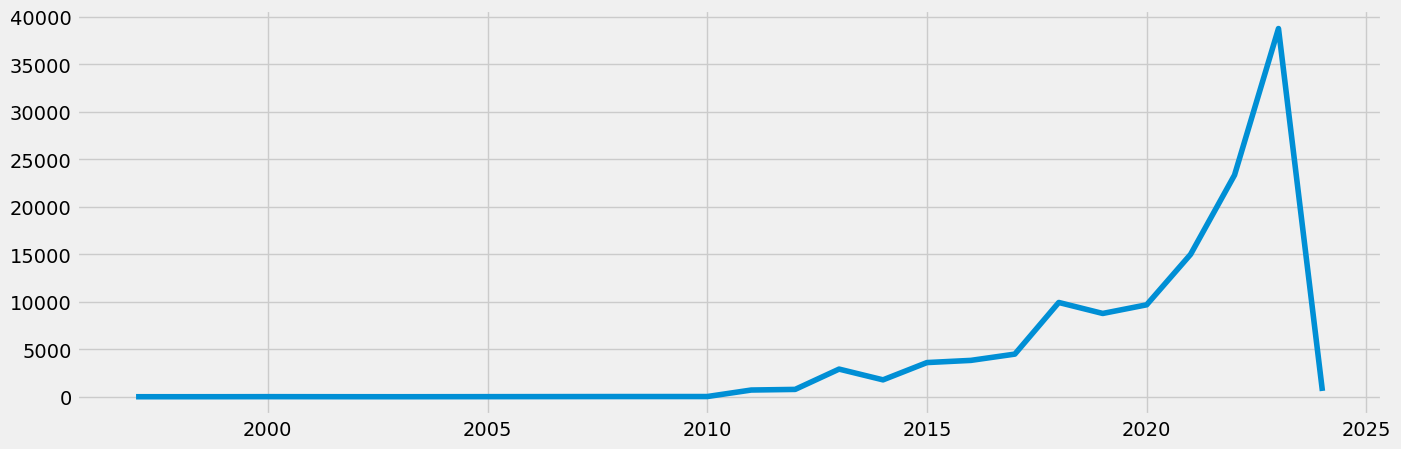

In [8]:
# Plot bev data using matplotlib

plt.figure(figsize=(15,5), dpi=100)

plt.plot(bev_count_year)

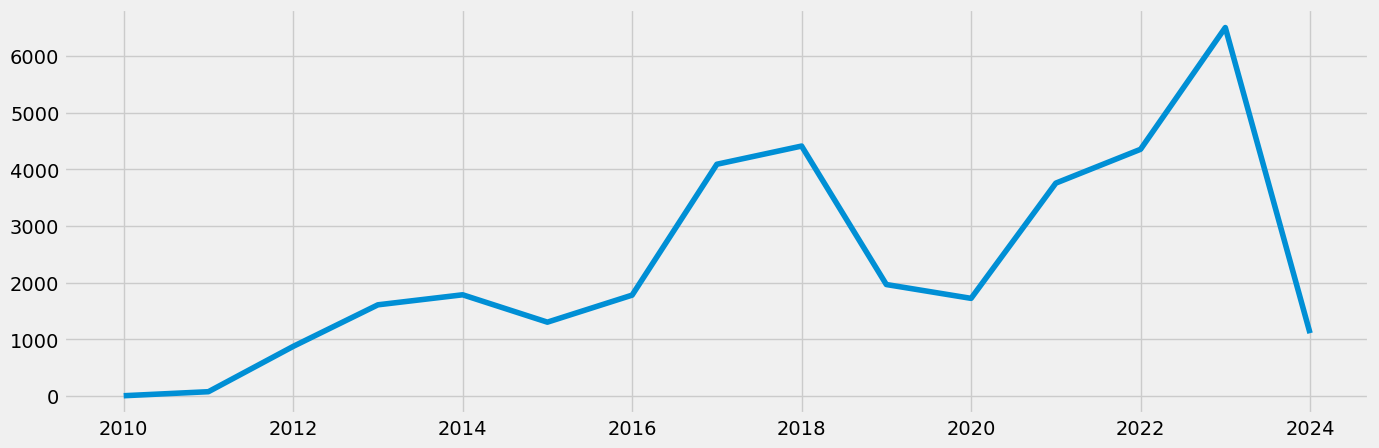

In [9]:
# Plot phev data using matplotlib

plt.figure(figsize=(15,5), dpi=100)

plt.plot(phev_count_year)

In [10]:
phev_count_year.shape

(15,)

In [11]:
phev_count_year

year
2010       3
2011      74
2012     873
2013    1607
2014    1784
2015    1301
2016    1778
2017    4087
2018    4408
2019    1965
2020    1721
2021    3754
2022    4351
2023    6499
2024    1106
Name: ev_type, dtype: int64

In [12]:
phev_count_year = phev_count_year.reset_index()

In [13]:
phev_count_year

,year,ev_type
0,2010,3
1,2011,74
2,2012,873
3,2013,1607
4,2014,1784
5,2015,1301
6,2016,1778
7,2017,4087
8,2018,4408
9,2019,1965


In [14]:
bev_count_year = bev_count_year.reset_index()

In [15]:
bev_count_year

,year,ev_type
0,1997,1
1,1998,1
2,1999,3
3,2000,8
4,2002,2
5,2003,1
6,2008,20
7,2010,21
8,2011,706
9,2012,772


In [16]:
bev_sub = bev_count_year.loc[(bev_count_year['year'] >=2010) & (bev_count_year['year'] <2024)]

phev_sub = phev_count_year.loc[(phev_count_year['year'] <2024)]

In [17]:
bev_sub

,year,ev_type
7,2010,21
8,2011,706
9,2012,772
10,2013,2908
11,2014,1777
12,2015,3596
13,2016,3826
14,2017,4486
15,2018,9919
16,2019,8764


In [18]:
phev_sub

,year,ev_type
0,2010,3
1,2011,74
2,2012,873
3,2013,1607
4,2014,1784
5,2015,1301
6,2016,1778
7,2017,4087
8,2018,4408
9,2019,1965


In [19]:
# Set the 'year' column as the index for 'bev'

from datetime import datetime

bev_sub['Year'] = bev_sub['year'].astype('str') + '-01' + '-01'
bev_sub['Year'] = pd.to_datetime(bev_sub['Year'])
bev_sub = bev_sub[['Year', 'ev_type']]
bev_sub = bev_sub.set_index("Year")
bev_sub.head()

,ev_type
Year,
2010-01-01,21
2011-01-01,706
2012-01-01,772
2013-01-01,2908
2014-01-01,1777


In [20]:
# Set the 'year' column as the index for 'bev'

from datetime import datetime

phev_sub['Year'] = phev_sub['year'].astype('str') + '-01' + '-01'
phev_sub['Year'] = pd.to_datetime(phev_sub['Year'])
phev_sub = phev_sub[['Year', 'ev_type']]
phev_sub = phev_sub.set_index("Year")
phev_sub.head()

,ev_type
Year,
2010-01-01,3
2011-01-01,74
2012-01-01,873
2013-01-01,1607
2014-01-01,1784


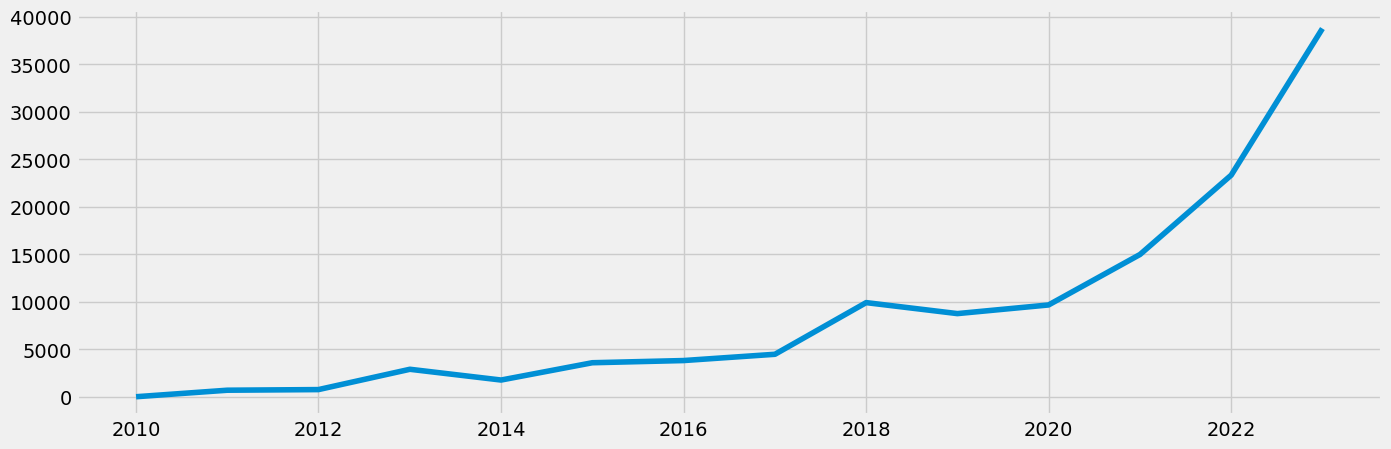

In [21]:
# Plot the new datasets

plt.figure(figsize=(15,5), dpi=100)
plt.plot(bev_sub)

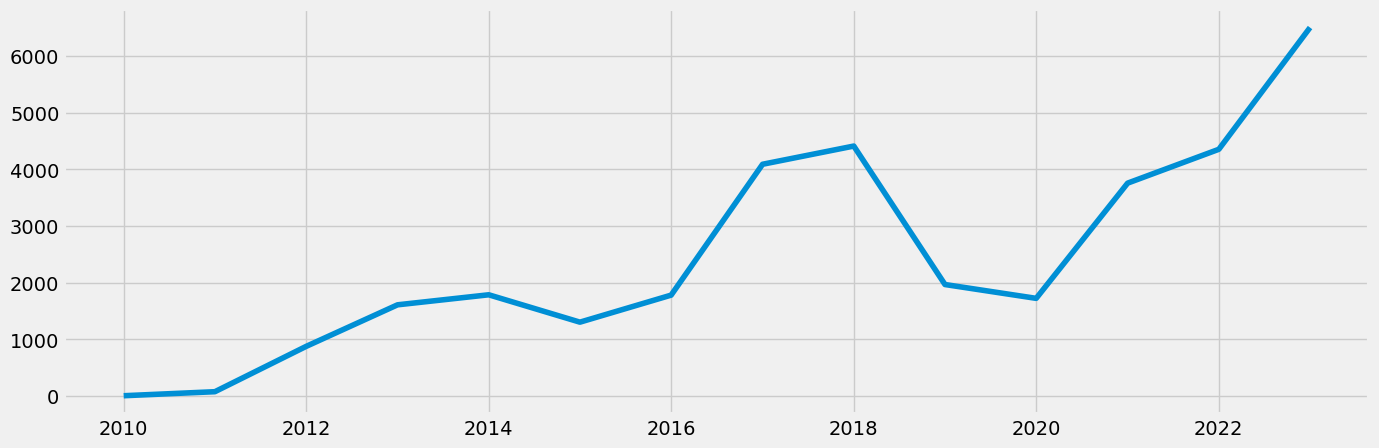

In [22]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(phev_sub)

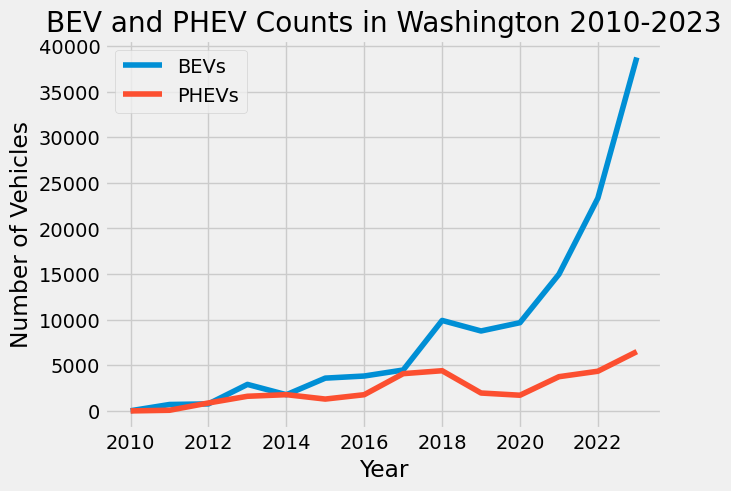

In [23]:
# Combine the two line charts

plt.plot(bev_sub, label = "BEVs")
plt.plot(phev_sub, label = "PHEVs")
plt.title("BEV and PHEV Counts in Washington 2010-2023")
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.show()

## 3. Time-series analysis: Decomposition

In [24]:
# Decompose the time-series using a 

bev_decomposition = sm.tsa.seasonal_decompose(bev_sub, model ='multiplicative')

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,7

<function matplotlib.pyplot.show(close=None, block=None)>

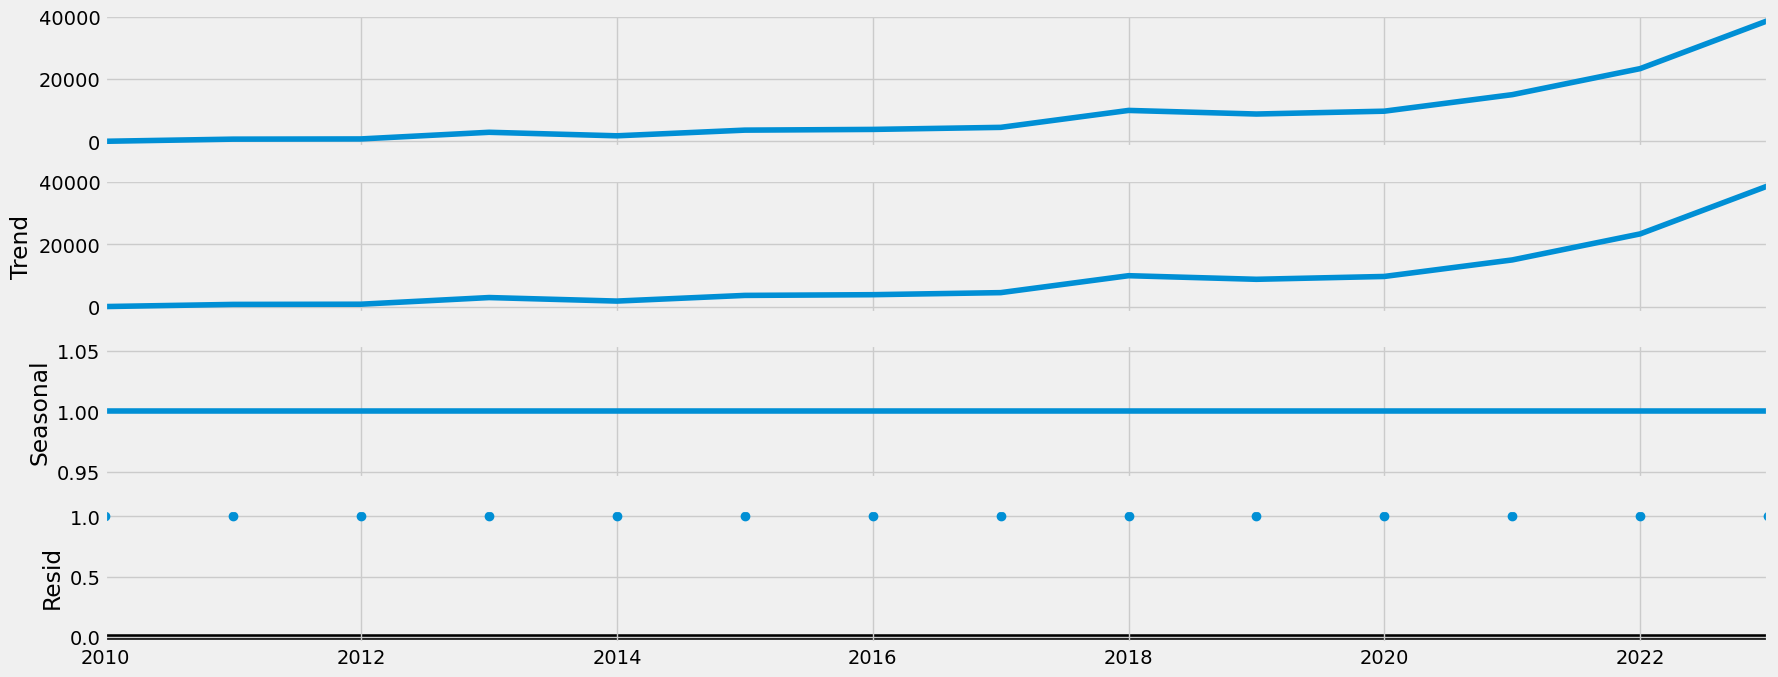

In [26]:
bev_decomposition.plot()
plt.show

In [27]:
phev_decomposition = sm.tsa.seasonal_decompose(phev_sub, model='multiplicative')

In [28]:
rcParams['figure.figsize'] = 18,7

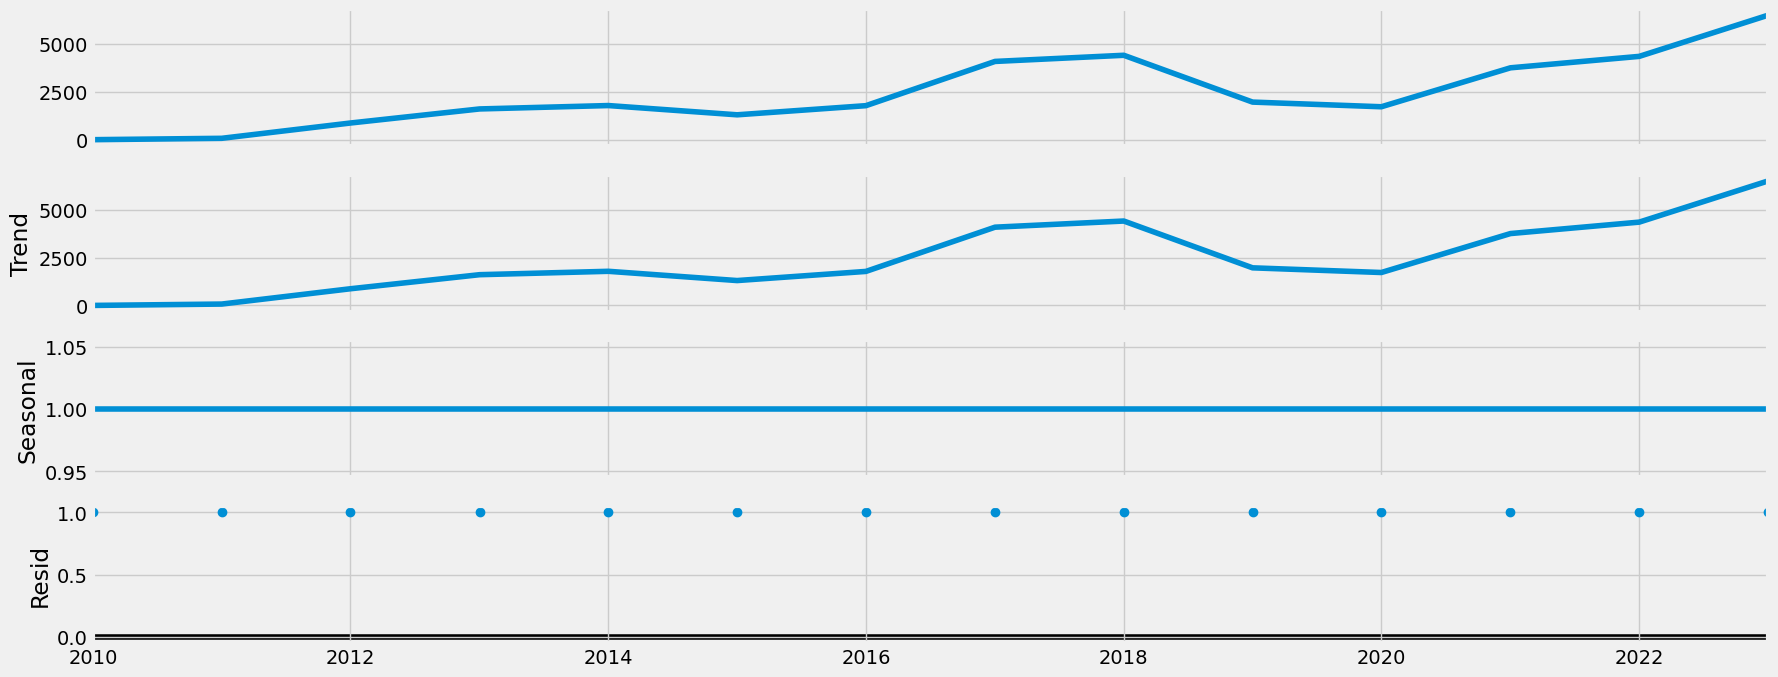

In [29]:
phev_decomposition.plot()
plt.show()

## 4. Testing for Stationarity

In [30]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time seriesb
dickey_fuller(bev_sub['ev_type'])

Dickey-Fuller Stationarity test:
Test Statistic                 2.471365
p-value                        0.999040
Number of Lags Used            5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


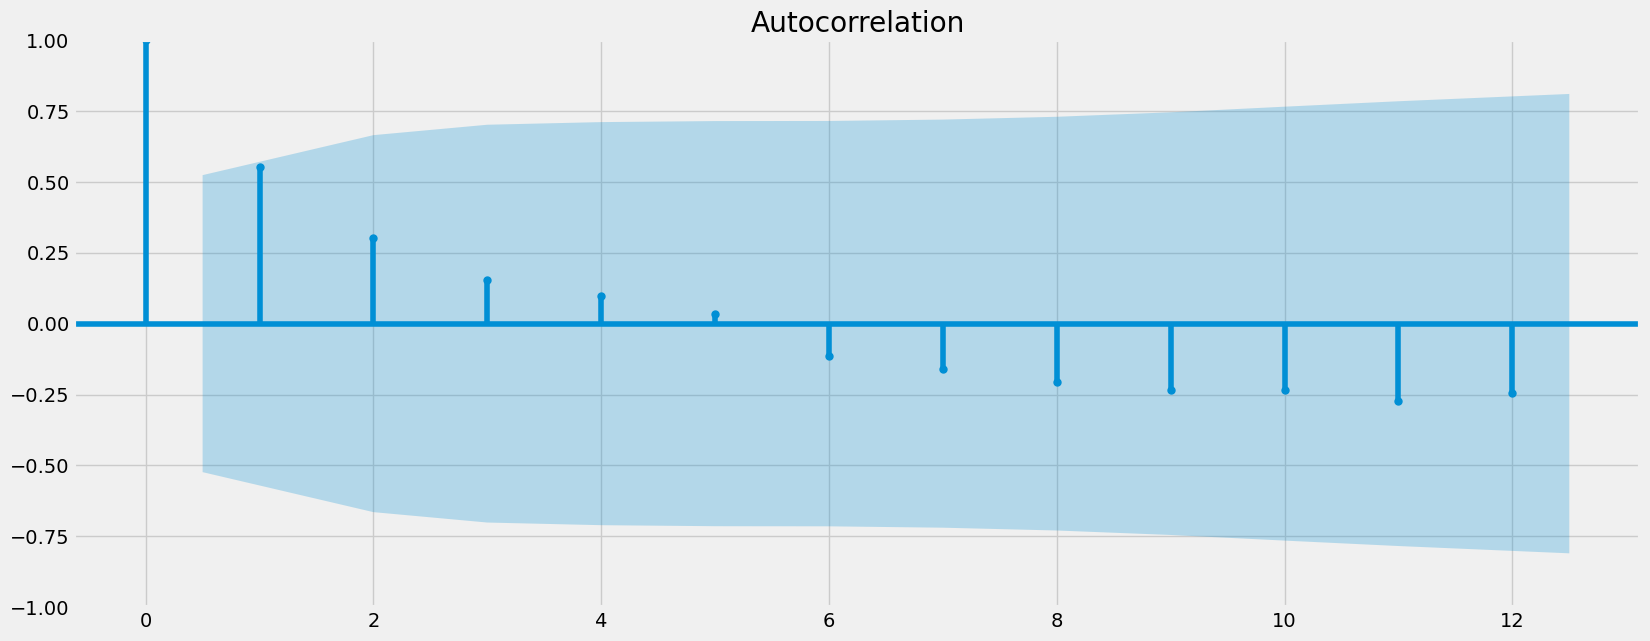

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(bev_sub)
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(phev_sub['ev_type'])

Dickey-Fuller Stationarity test:
Test Statistic                -0.848886
p-value                        0.804339
Number of Lags Used            4.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


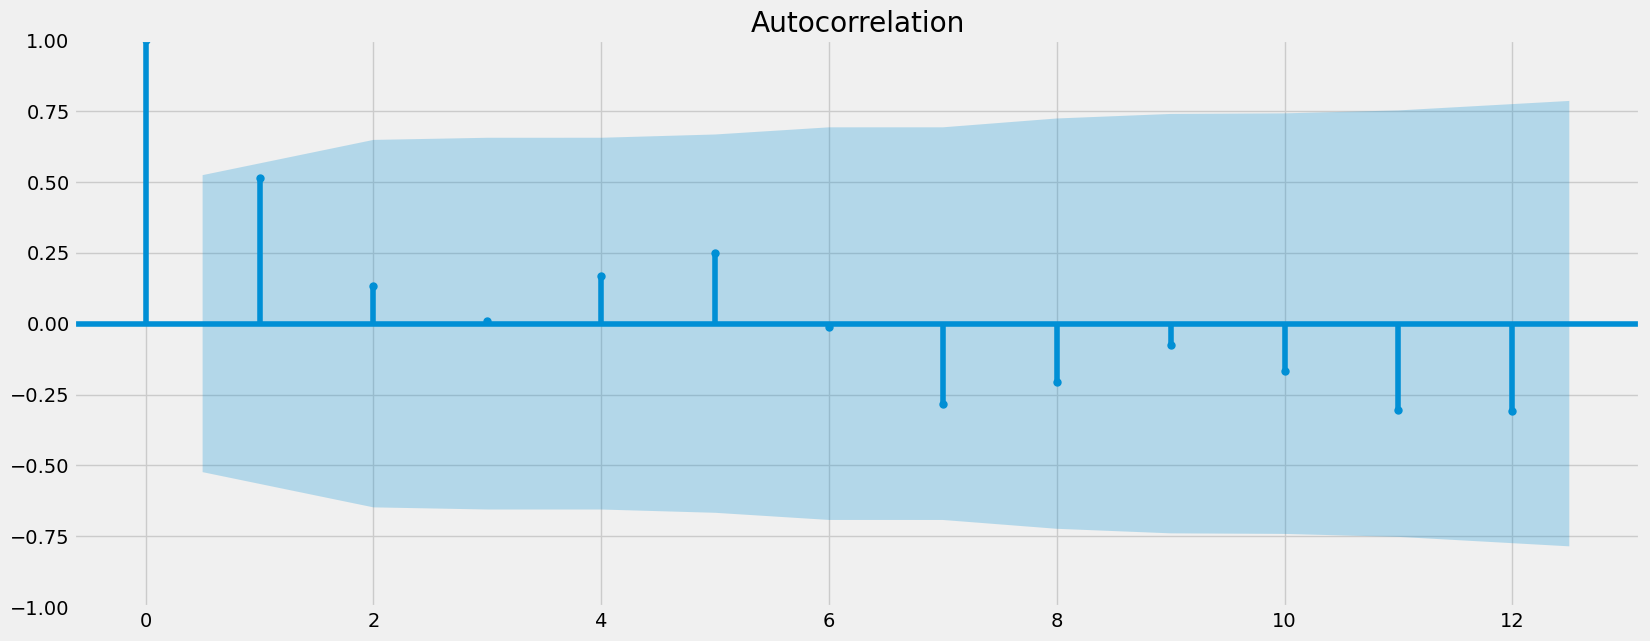

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(phev_sub)
plt.show()

## 5. Stationarizing the EV Data

In [34]:
bev_diff = bev_sub - bev_sub.shift(1)

In [35]:
phev_diff = phev_sub - phev_sub.shift(1)

In [36]:
bev_diff.dropna(inplace = True)

In [37]:
phev_diff.dropna(inplace = True)

In [38]:
bev_diff.head()

,ev_type
Year,
2011-01-01,685.0
2012-01-01,66.0
2013-01-01,2136.0
2014-01-01,-1131.0
2015-01-01,1819.0


In [39]:
phev_diff.head()

,ev_type
Year,
2011-01-01,71.0
2012-01-01,799.0
2013-01-01,734.0
2014-01-01,177.0
2015-01-01,-483.0


In [40]:
bev_diff.columns

Index(['ev_type'], dtype='object')

In [41]:
phev_diff.columns

Index(['ev_type'], dtype='object')

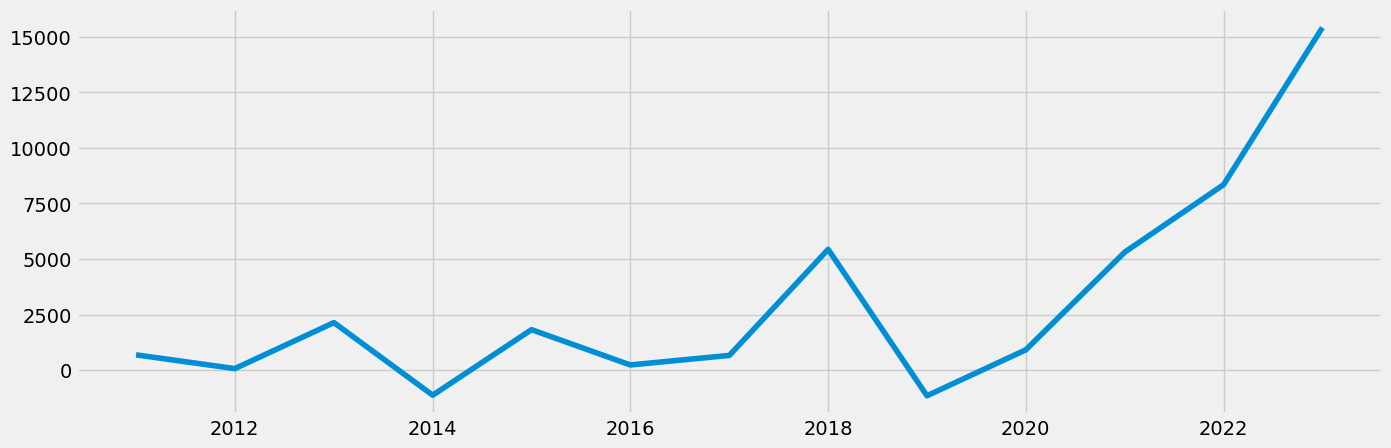

In [42]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(bev_diff)

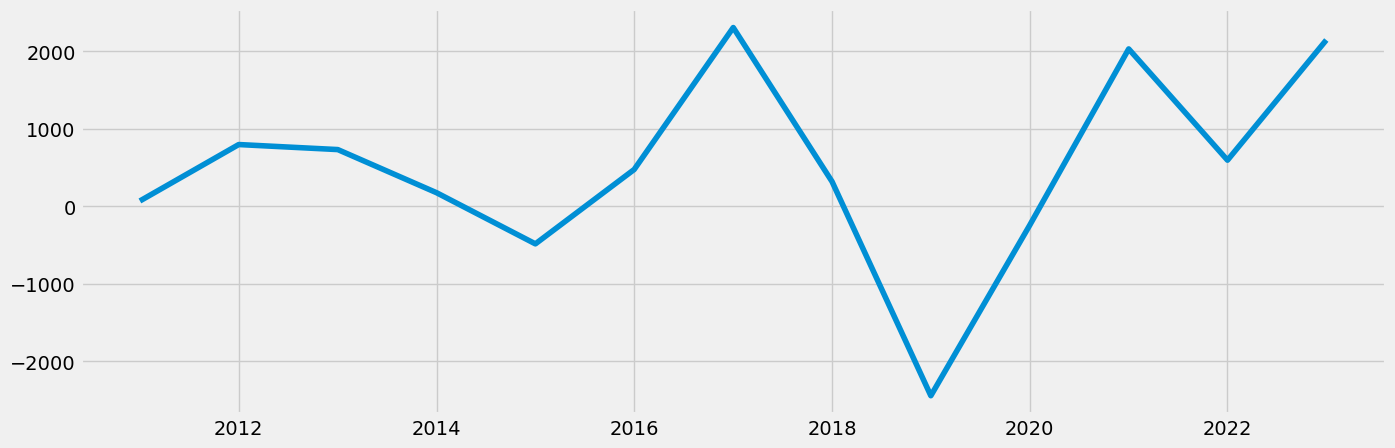

In [43]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(phev_diff)

In [44]:
dickey_fuller(bev_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 3.060829
p-value                        1.000000
Number of Lags Used            4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [45]:
dickey_fuller(phev_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -4.360217
p-value                        0.000349
Number of Lags Used            3.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


### **We can now reject the null-hypothesis for PHEV's as the test statistic is smaller than the 5% Critical Value and the p-value is 0.000349 (much smaller than 0.05). However we cannot reject the null-hypothesis for BEV's.**

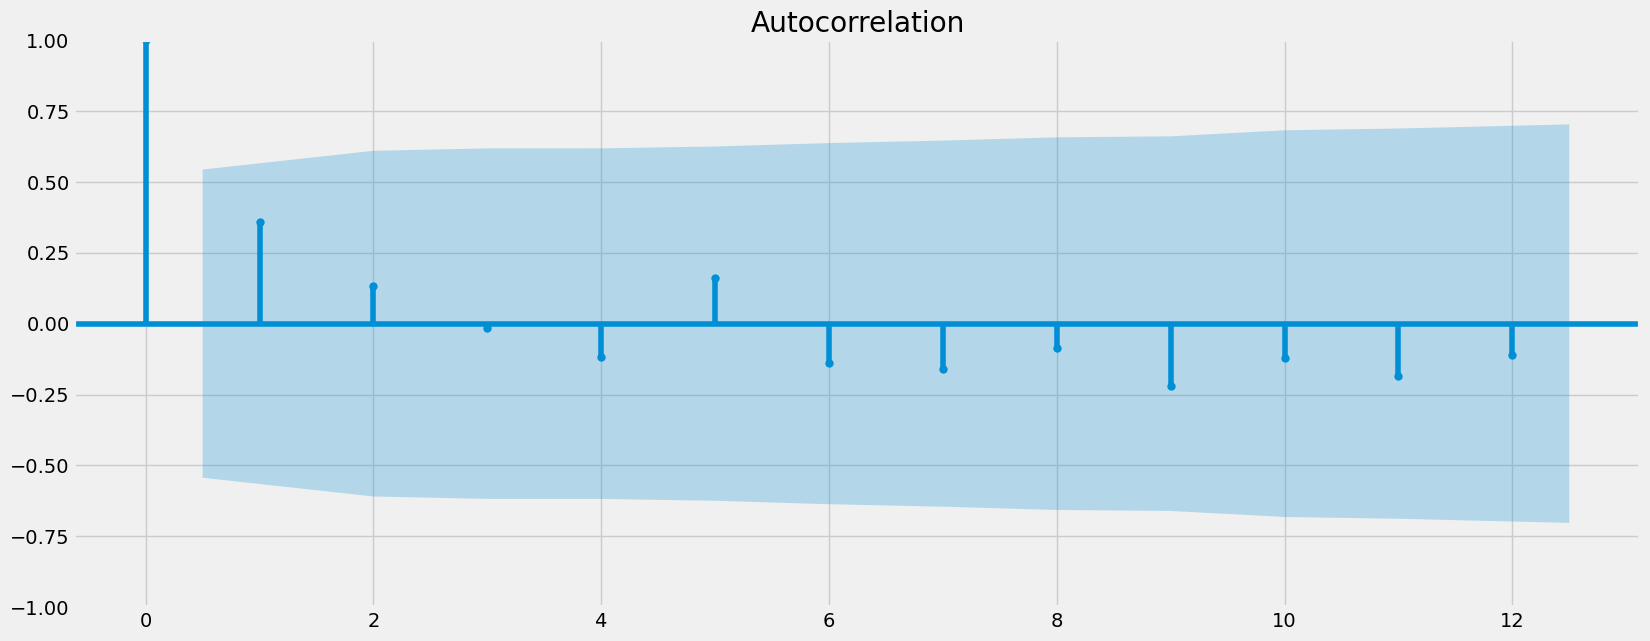

In [46]:
plot_acf(bev_diff)
plt.show()

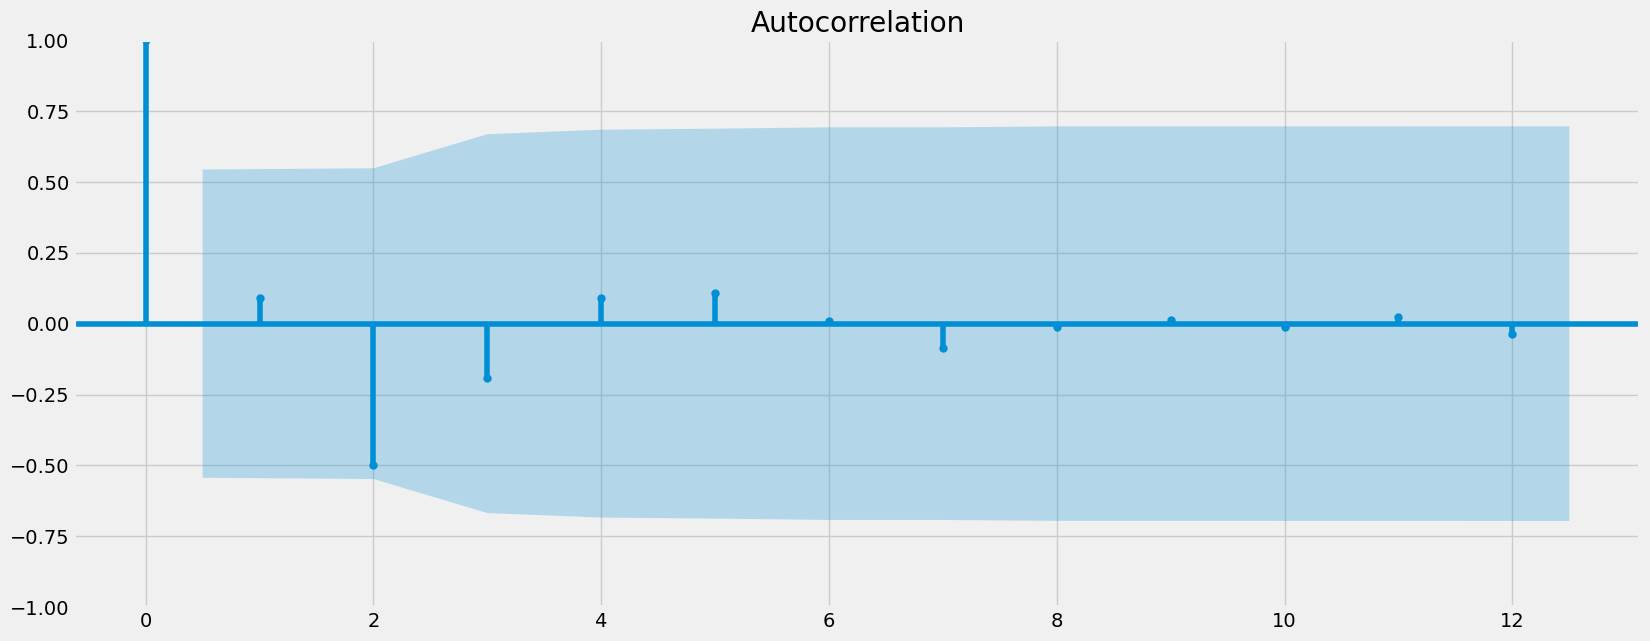

In [47]:
plot_acf(phev_diff)
plt.show()

In [48]:
bev_diff.to_csv(os.path.join(path, 'Assignment Data', 'Prepared EV Data', "Stationarized BEV Data.csv"))

In [49]:
phev_diff.to_csv(os.path.join(path, 'Assignment Data', 'Prepared EV Data', "Stationarized PHEV Data.csv"))

# Post Assignment Exploratory Analysis

In [53]:
# Create a subset containing only necessary columns for the rest pf the analysis. 
df_exp = df[['county', 'city', 'state', 'postal_code', 'year', 'make','model', 'ev_type', 'electric_range', 'base_msrp',]]

In [54]:
# View a list of values in the 'make' column to be able to track brand popularity over time.
column_values = df_exp['make'].tolist()

In [55]:
column_values

['CHRYSLER',
 'CHRYSLER',
 'KIA',
 'TESLA',
 'NISSAN',
 'KIA',
 'MINI',
 'TESLA',
 'TOYOTA',
 'TESLA',
 'NISSAN',
 'FORD',
 'NISSAN',
 'NISSAN',
 'TESLA',
 'VOLVO',
 'NISSAN',
 'TESLA',
 'NISSAN',
 'NISSAN',
 'TESLA',
 'FORD',
 'CHEVROLET',
 'NISSAN',
 'TESLA',
 'NISSAN',
 'FIAT',
 'CHEVROLET',
 'KIA',
 'CHEVROLET',
 'TESLA',
 'TESLA',
 'AUDI',
 'TOYOTA',
 'AUDI',
 'TESLA',
 'KIA',
 'TESLA',
 'NISSAN',
 'TESLA',
 'TESLA',
 'FIAT',
 'TESLA',
 'BMW',
 'TOYOTA',
 'TESLA',
 'NISSAN',
 'TESLA',
 'TESLA',
 'BMW',
 'NISSAN',
 'NISSAN',
 'NISSAN',
 'NISSAN',
 'TESLA',
 'TESLA',
 'TESLA',
 'CHEVROLET',
 'FIAT',
 'TESLA',
 'TESLA',
 'TOYOTA',
 'CHEVROLET',
 'NISSAN',
 'JEEP',
 'TESLA',
 'TESLA',
 'TESLA',
 'TESLA',
 'NISSAN',
 'TESLA',
 'BMW',
 'NISSAN',
 'MINI',
 'NISSAN',
 'TESLA',
 'POLESTAR',
 'TOYOTA',
 'NISSAN',
 'JEEP',
 'NISSAN',
 'CHEVROLET',
 'KIA',
 'BMW',
 'CHEVROLET',
 'TESLA',
 'KIA',
 'FORD',
 'BMW',
 'AUDI',
 'JEEP',
 'BMW',
 'NISSAN',
 'HONDA',
 'KIA',
 'NISSAN',
 'CHEVROLET',
 

In [56]:
unique_values = df_exp['make'].unique()

In [57]:
# Find all the unique values within the 'make' column
unique_values

array(['CHRYSLER', 'KIA', 'TESLA', 'NISSAN', 'MINI', 'TOYOTA', 'FORD',
       'VOLVO', 'CHEVROLET', 'FIAT', 'AUDI', 'BMW', 'JEEP', 'POLESTAR',
       'HONDA', 'VOLKSWAGEN', 'LINCOLN', 'MERCEDES-BENZ', 'RIVIAN',
       'PORSCHE', 'HYUNDAI', 'SUBARU', 'SMART', 'JAGUAR', 'MITSUBISHI',
       'CADILLAC', 'LEXUS', 'ALFA ROMEO', 'MAZDA', 'GENESIS', 'LUCID',
       'LAND ROVER', 'DODGE', 'TH!NK', 'WHEEGO ELECTRIC CARS', 'FISKER',
       'BENTLEY', 'AZURE DYNAMICS'], dtype=object)

In [58]:
make_counts = df_exp['make'].value_counts()
print(make_counts)

TESLA                   72442
NISSAN                  13794
CHEVROLET               12567
FORD                     8009
BMW                      6842
KIA                      6753
TOYOTA                   5534
VOLKSWAGEN               4424
VOLVO                    3746
JEEP                     3689
HYUNDAI                  3670
AUDI                     3246
RIVIAN                   2934
CHRYSLER                 2859
MERCEDES-BENZ            1189
PORSCHE                  1065
MITSUBISHI                911
HONDA                     833
MINI                      821
POLESTAR                  804
FIAT                      795
SUBARU                    690
SMART                     276
MAZDA                     269
LINCOLN                   236
JAGUAR                    220
LUCID                     208
LEXUS                     201
CADILLAC                  197
GENESIS                   130
LAND ROVER                 48
ALFA ROMEO                 19
FISKER                     17
AZURE DYNA

Text(0, 0.5, 'Count')

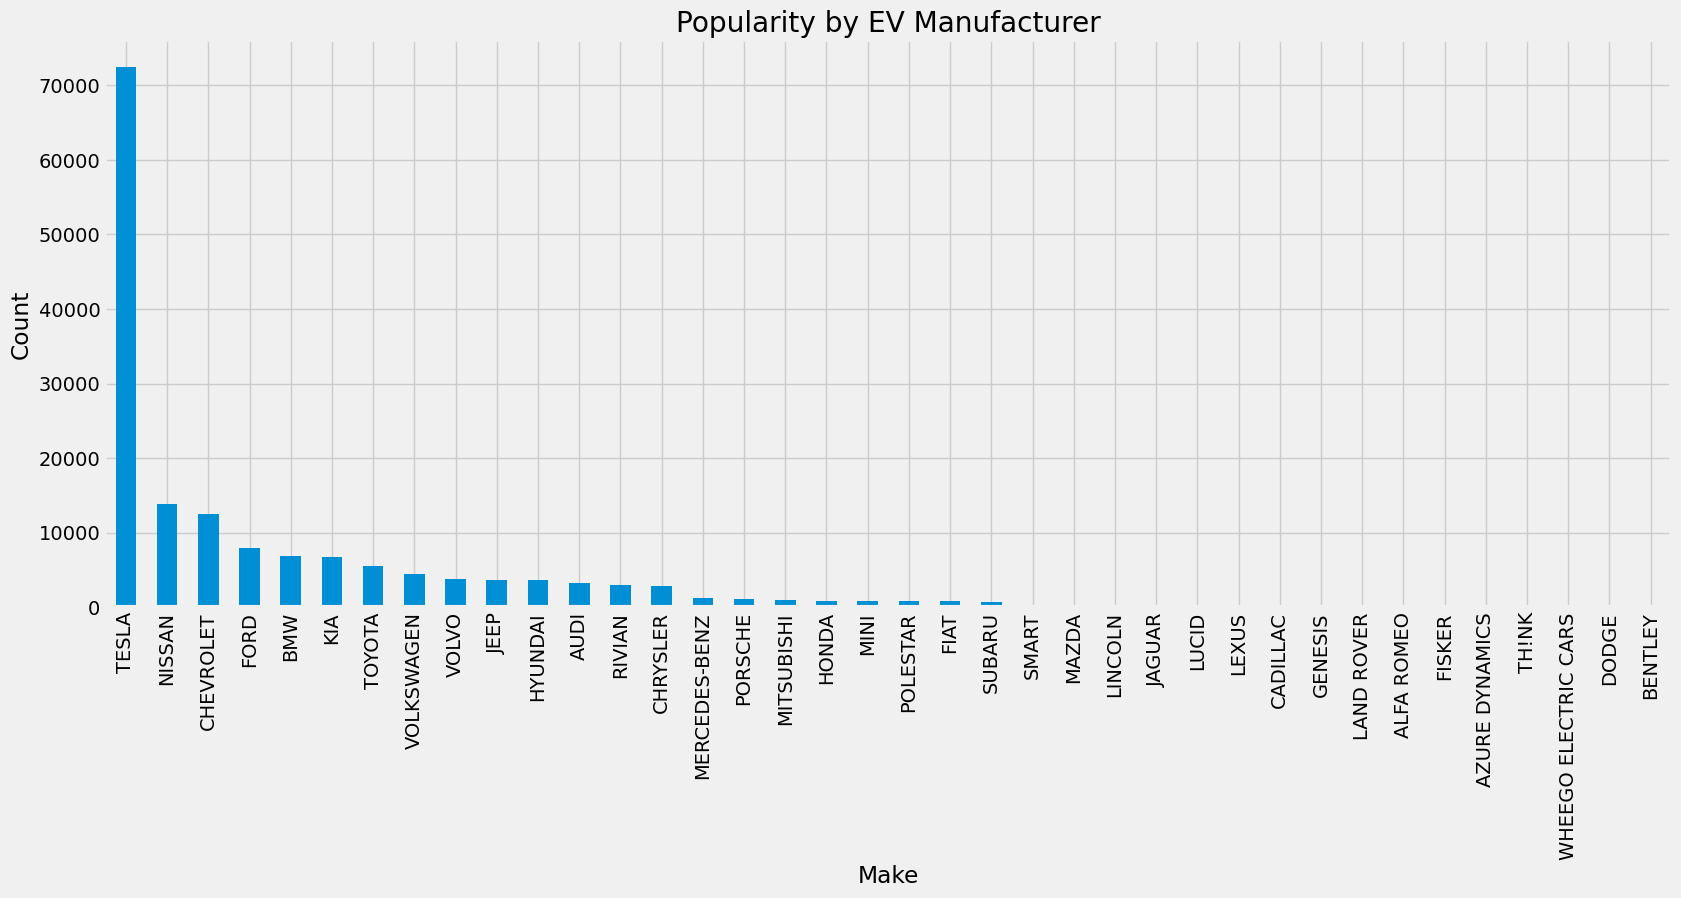

In [64]:
# Visualize the counts of each electric vehicle make in WA
make_chart = df_exp['make'].value_counts().plot.bar()
plt.title("Popularity by EV Manufacturer")
plt.xlabel('Make')
plt.ylabel('Count')

In [62]:
# Export Chart

make_chart.figure.savefig(os.path.join(path, 'EV Analysis', 'EV Make Count Bar.png'))

Text(0, 0.5, 'Count')

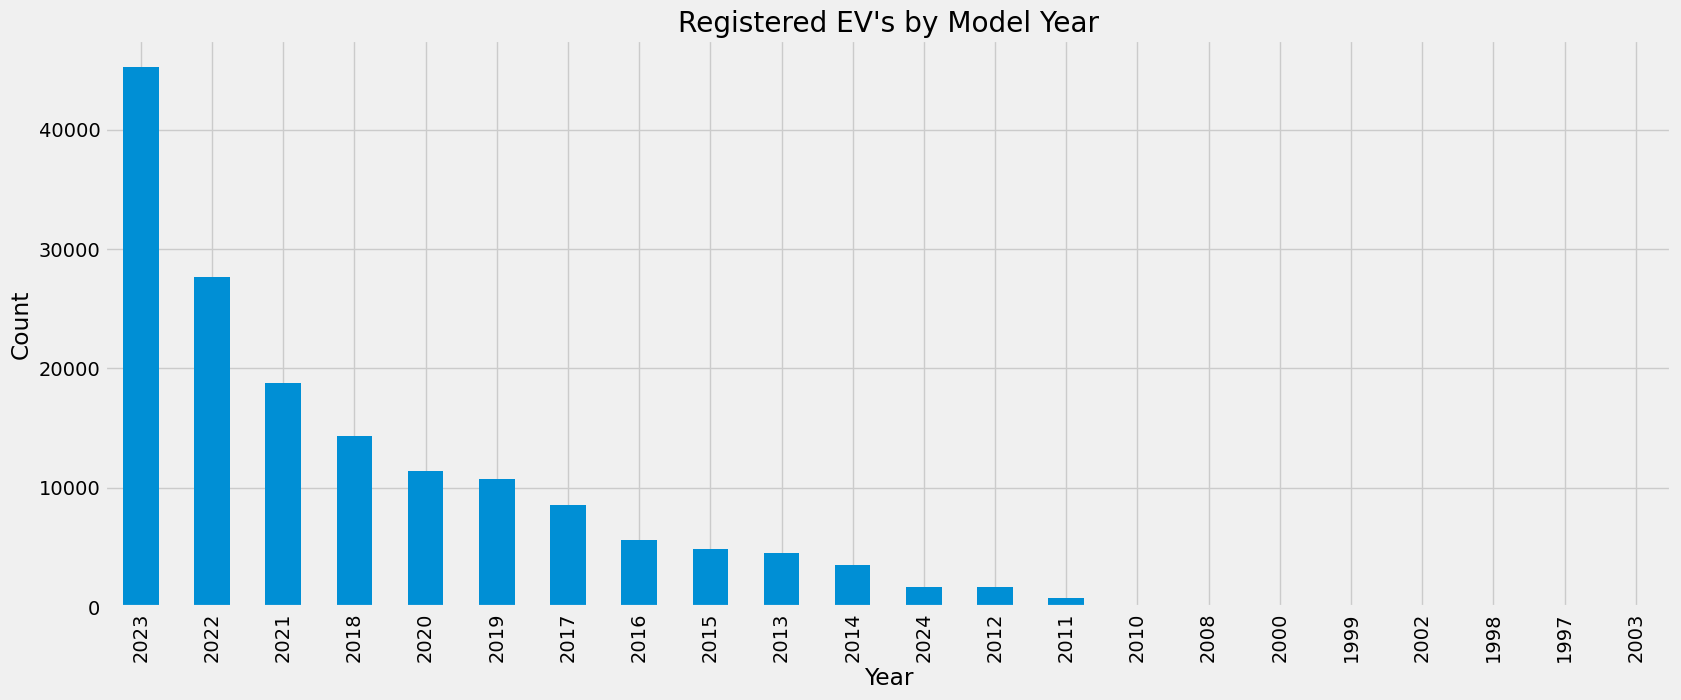

In [65]:
model_year_chart = df_exp['year'].value_counts().plot.bar()
plt.title ("Registered EV's by Model Year")
plt.xlabel('Year')
plt.ylabel('Count')

In [66]:
model_year_chart.figure.savefig(os.path.join(path, 'EV Analysis', 'EV Model Year Count'))

In [67]:
df_exp.head()

,county,city,state,postal_code,year,make,model,ev_type,electric_range,base_msrp
0,Kitsap,Bremerton,WA,98311,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),33,0
1,Stevens,Colville,WA,99114,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),32,0
2,Yakima,Yakima,WA,98908,2022,KIA,EV6,Battery Electric Vehicle (BEV),0,0
3,Kitsap,Bainbridge Island,WA,98110,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),215,0
4,Thurston,Tumwater,WA,98501,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),151,0


In [69]:
top_model_counts = df_exp['model'].value_counts().head(20)

<Axes: >

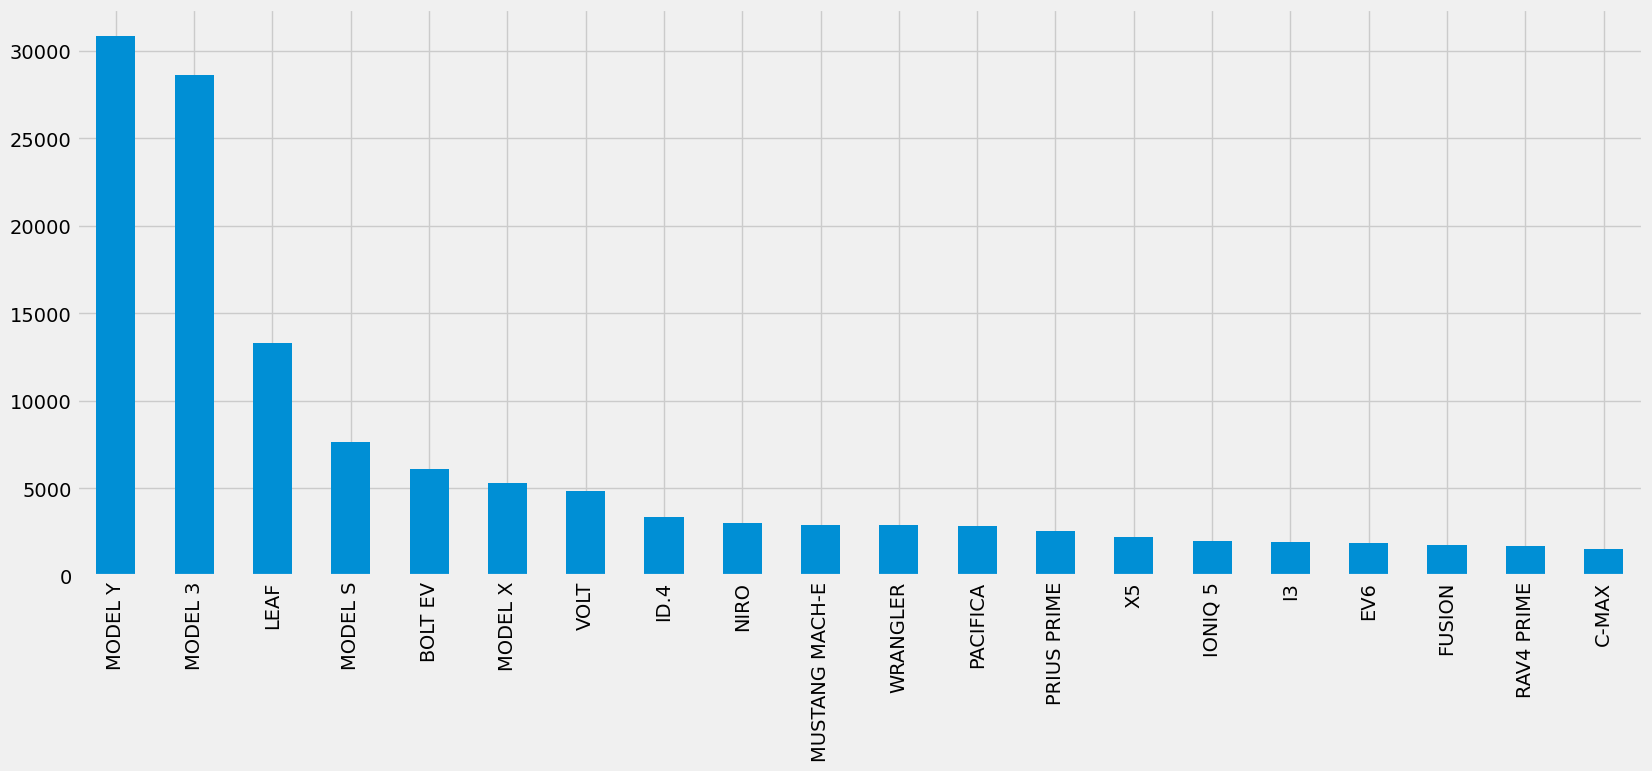

In [70]:
top_model_counts.plot(kind='bar')

In [90]:
make_model = df_exp.groupby(['make', 'model']).count_distinct()

AttributeError: 'DataFrameGroupBy' object has no attribute 'count_distinct'

In [86]:
make_model_top_20 = make_model.sort_values(by= value_count, ascending=True).head(20)

NameError: name 'value_count' is not defined

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '(BMW, 330E)'),
  Text(1, 0, '(FIAT, 500)'),
  Text(2, 0, '(BMW, 530E)'),
  Text(3, 0, '(BMW, 740E)'),
  Text(4, 0, '(BMW, 745E)'),
  Text(5, 0, '(BMW, 745LE)'),
  Text(6, 0, '(PORSCHE, 918)'),
  Text(7, 0, '(AUDI, A3)'),
  Text(8, 0, '(AUDI, A7)'),
  Text(9, 0, '(AUDI, A8 E)'),
  Text(10, 0, '(HONDA, ACCORD)'),
  Text(11, 0, '(LUCID, AIR)'),
  Text(12, 0, '(NISSAN, ARIYA)'),
  Text(13, 0, '(LINCOLN, AVIATOR)'),
  Text(14, 0, '(MERCEDES-BENZ, B-CLASS)'),
  Text(15, 0, '(BENTLEY, BENTAYGA)'),
  Text(16, 0, '(CHEVROLET, BOLT EUV)'),
  Text(17, 0, '(CHEVROLET, BOLT EV)'),
  Text(18, 0, '(TOYOTA, BZ4X)'),
  Text(19, 0, '(MERCEDES-BENZ, C-CLASS)')])

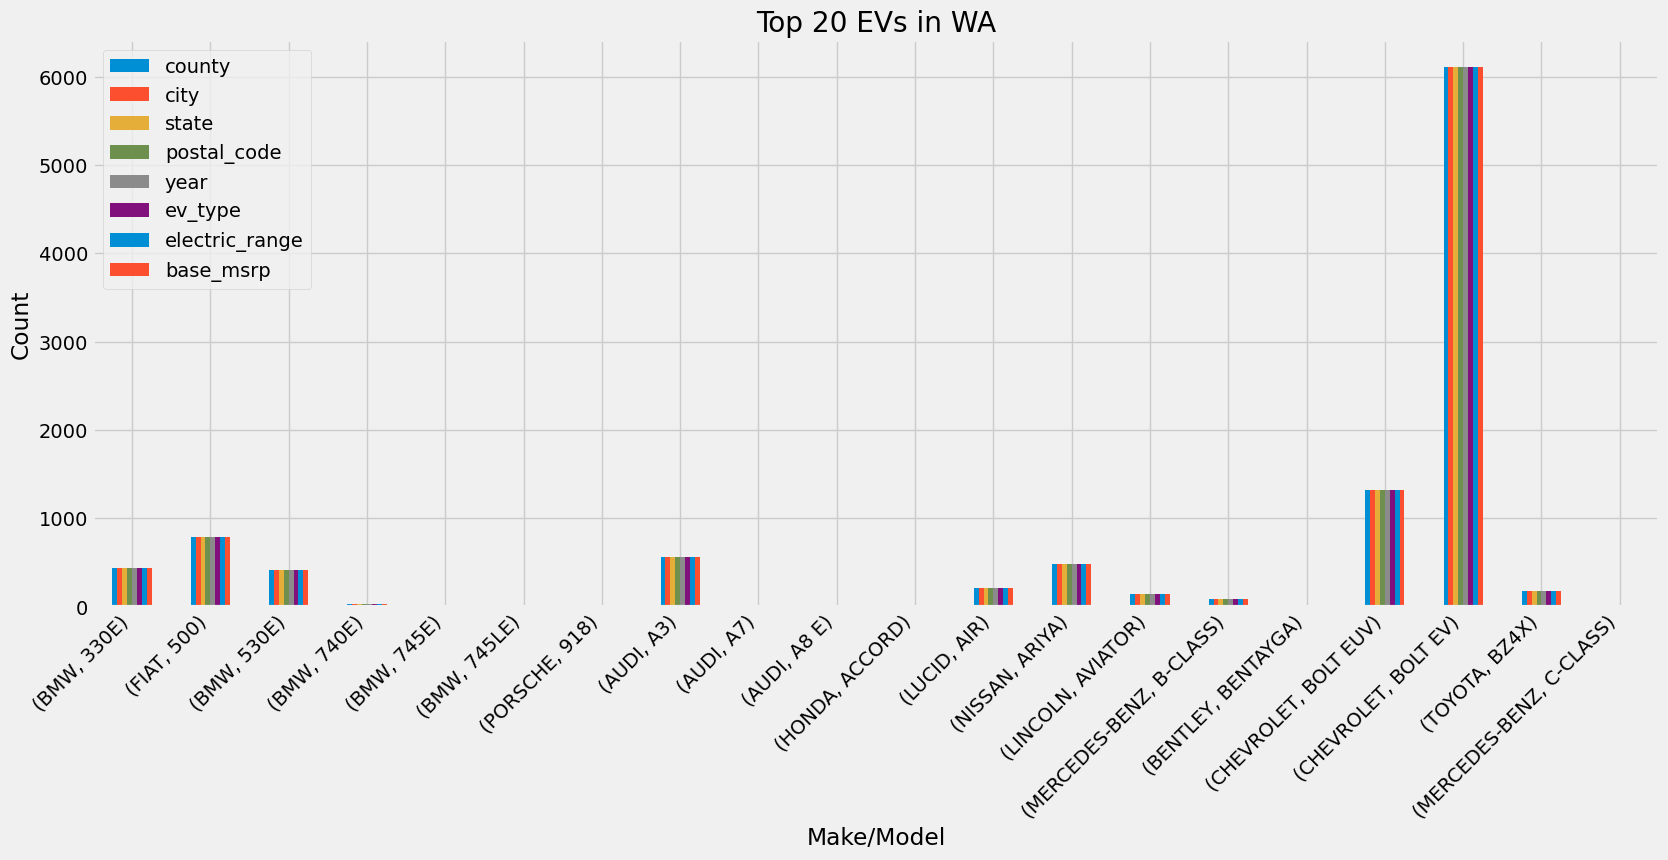

In [85]:
make_model_top_20.plot(kind='bar')
plt.title('Top 20 EVs in WA')
plt.xlabel('Make/Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
          